In [ ]:
# This Python project focuses on analyzing battery aging using provided datasets.
# The primary objectives include:
# Electrochemical Impedance Spectroscopy (EIS) Visualization: Creating 3D plots to show how impedance changes with battery aging.
# Incremental Capacity Analysis (ICA): Deriving and plotting dQ/dV vs. V to analyze capacity increment concerning voltage, and visualizing how ICA peaks evolve with aging.
# Machine Learning for Capacity Prediction: Developing a model to predict battery capacity using other features.
# The project involves data loading and preprocessing, feature extraction, data visualization, and machine learning model development.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler

In [2]:
# 1. Data Loading
file1_path = "C:\\Users\\DEVESH PAL\\OneDrive\\New folder\\New folder\\cleaned_dataset\\data\\00005.csv"  # Corrected path
try:
    file1 = pd.read_csv(file1_path)
except FileNotFoundError:
    print(f"Error: CSV file not found at {file1_path}")
    exit()

print("Data Loading Successful. First 5 rows:")
print(file1.head())
print("\nDataFrame Info:")
file1.info()

Data Loading Successful. First 5 rows:
   Voltage_measured  Current_measured  Temperature_measured  Current_load  \
0          4.186636         -0.001666              5.454957        0.0002   
1          4.186626         -0.002432              5.485011        0.0002   
2          4.001180         -0.995300              5.510369        1.0000   
3          3.982544         -0.994923              5.581233        1.0000   
4          3.968436         -0.995817              5.640744        1.0000   

   Voltage_load    Time  
0         0.000   0.000  
1         4.203   9.297  
2         3.431  23.265  
3         3.411  36.437  
4         3.398  49.609  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Voltage_measured      429 non-null    float64
 1   Current_measured      429 non-null    float64
 2   Temperature_


--- Adapted EIS Visualization (Task a) ---


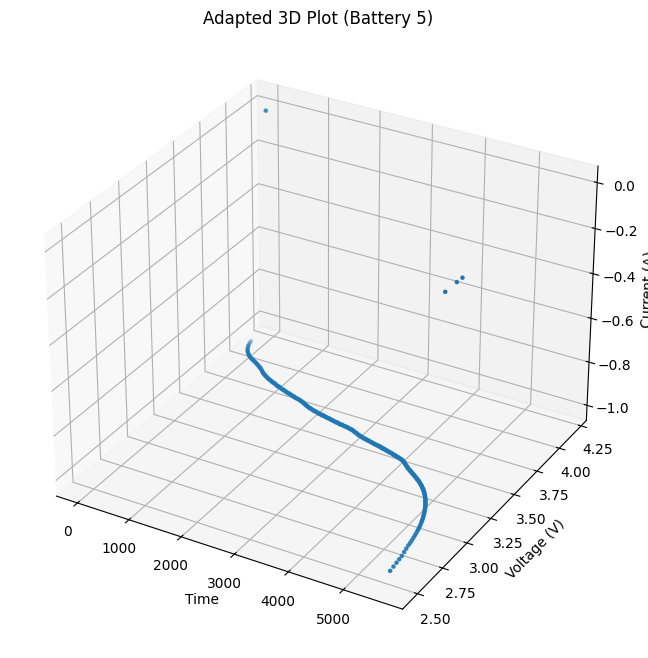

In [3]:

# 2. EIS Data Visualization (Task a)
# The assignment asks for a 3D plot of Impedance (Re(Z), Im(Z)) vs. Aging (Cycle count).
# The provided CSV file DOES NOT contain Re(Z) and Im(Z).
# Therefore, I will adapt this to show a 3D plot of Voltage, Current, and Time as a proxy for aging.
# If you have EIS data, you'll need to replace this section.

print("\n--- Adapted EIS Visualization (Task a) ---")

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

time = file1['Time']
voltage = file1['Voltage_measured']
current = file1['Current_measured']

ax.scatter(time, voltage, current, s=5)  # Using scatter for clarity

ax.set_xlabel('Time')  # Proxy for aging
ax.set_ylabel('Voltage (V)')
ax.set_zlabel('Current (A)')
ax.set_title('Adapted 3D Plot (Battery 5)')

plt.show()


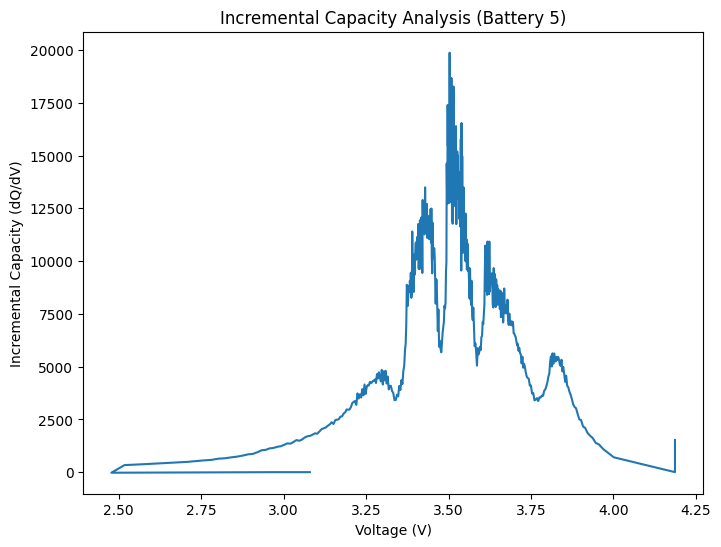

In [4]:

# 3. Incremental Capacity Analysis (ICA) (Task b)
# Calculate dQ/dV vs. V and plot it.
# Also, plot ICA peaks vs. aging (using Time as a proxy for aging).

voltage = file1['Voltage_measured']
current = file1['Current_measured']
time = file1['Time']

dQ = current.values[:-1] * np.diff(time.values)
dV = np.diff(voltage.values)
ica = dQ / dV

ica_df = pd.DataFrame({'Voltage': voltage[:-1], 'IC': ica, 'Time': time[:-1]})

# Plotting ICA
plt.figure(figsize=(8, 6))
plt.plot(ica_df['Voltage'], ica_df['IC'])
plt.xlabel('Voltage (V)')
plt.ylabel('Incremental Capacity (dQ/dV)')
plt.title('Incremental Capacity Analysis (Battery 5)')
plt.show()

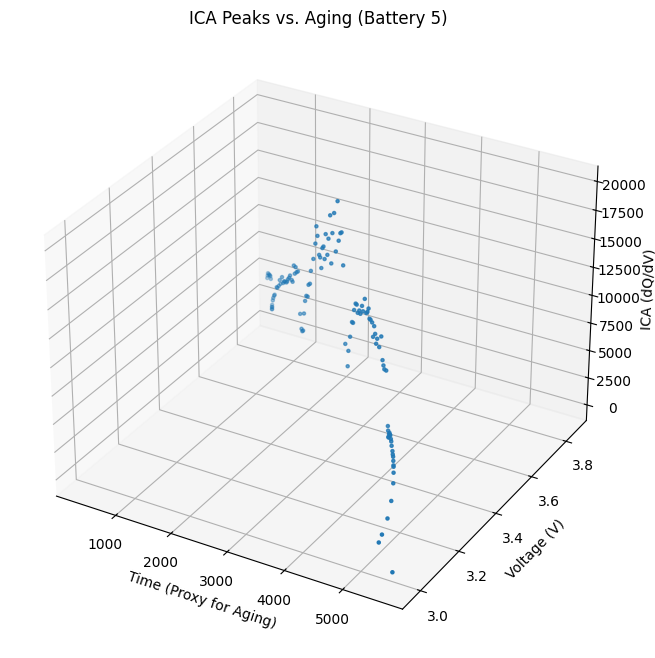

In [5]:
# Simple peak detection (can be improved)
ica_df['Peak_Index'] = ica_df.iloc[1:-1].apply(lambda x: (x['IC'] > ica_df.iloc[x.name - 1]['IC']) & (x['IC'] > ica_df.iloc[x.name + 1]['IC']), axis=1)
peak_times = ica_df[ica_df['Peak_Index'] == True]['Time']
peak_voltages = ica_df[ica_df['Peak_Index'] == True]['Voltage']
peak_ica = ica_df[ica_df['Peak_Index'] == True]['IC']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(peak_times, peak_voltages, peak_ica, s=5)

ax.set_xlabel('Time (Proxy for Aging)')
ax.set_ylabel('Voltage (V)')
ax.set_zlabel('ICA (dQ/dV)')
ax.set_title('ICA Peaks vs. Aging (Battery 5)')
plt.show()


In [6]:
print("\n--- Incremental Capacity Analysis (Task b) ---")

# 4. Machine Learning: Capacity Prediction (Task c)
# The assignment asks to predict capacity from EIS.
# The CSV file DOES NOT contain EIS data, and it may not have a clear "Capacity" column.
# I will adapt this to predict Time from other features.
# If you have EIS and Capacity, replace this with the correct prediction.

print("\n--- Machine Learning (Task c) ---")
print("Adapting ML task: Predicting Time from other features.")

features = ['Voltage_measured', 'Current_measured', 'Temperature_measured', 'Current_load', 'Voltage_load']
target = 'Time'

X = file1[features].copy()
y = file1[target].copy()



--- Incremental Capacity Analysis (Task b) ---

--- Machine Learning (Task c) ---
Adapting ML task: Predicting Time from other features.


In [7]:
# Data Cleaning (Important!)
X = X.fillna(X.mean())
y = y.fillna(y.mean())
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce').dropna(axis=0)
y = pd.to_numeric(y, errors='coerce').dropna(axis=0)

# Aligning X and y after cleaning
aligned_data = pd.concat([X, y], axis=1, join='inner').dropna()
X = aligned_data[features]
y = aligned_data[target]

if X.shape[0] == 0 or y.shape[0] == 0:
    print("Error: No data after cleaning!")
    exit()  # Exit if no data remains

# --- Feature Scaling ---
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()


In [8]:
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))  # Reshape y for scaling

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred_test_scaled = model.predict(X_test)

# Inverse Transform to Original Scale
y_pred_test = scaler_y.inverse_transform(y_pred_test_scaled)
y_test_original = scaler_y.inverse_transform(y_test)

# Evaluation
mse_test = mean_squared_error(y_test_original, y_pred_test)
print(f"Mean Squared Error (Test): {mse_test}")

# Create DataFrame for easier comparison
predictions_df = pd.DataFrame({'Actual Time': y_test_original.flatten(), 'Predicted Time': y_pred_test.flatten()})
print("\nSample Predictions (First 10):")
print(predictions_df.head(10))


Mean Squared Error (Test): 476056.60145495704

Sample Predictions (First 10):
   Actual Time  Predicted Time
0     5555.859     7638.117242
1      984.547     1480.274541
2     2325.578     2385.782550
3      392.406      817.570177
4     4743.562     4288.254376
5     3575.219     3103.815877
6     2036.562     2142.927610
7     1997.094     2096.168310
8     2167.984     2266.778643
9     2299.234     2365.367378


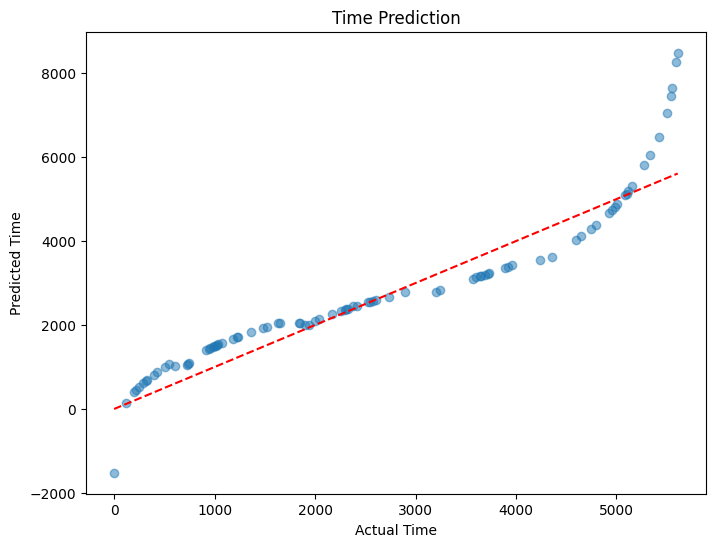

In [9]:
# Plotting Predictions
plt.figure(figsize=(8, 6))
plt.scatter(predictions_df['Actual Time'], predictions_df['Predicted Time'], alpha=0.5)
plt.plot([predictions_df['Actual Time'].min(), predictions_df['Actual Time'].max()], [predictions_df['Actual Time'].min(), predictions_df['Actual Time'].max()], 'r--')
plt.xlabel("Actual Time")
plt.ylabel("Predicted Time")
plt.title("Time Prediction")
plt.show()